#### Import Libraries 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [14]:
train = pd.read_csv("Data\Housing_dataset_train.csv")
test = pd.read_csv("Data\Housing_dataset_test.csv")
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [15]:
train['ind'] = 1
test['ind'] = 0

# Concatenate train and test DataFrames
combined_df = pd.concat([train, test])

# Output the combined DataFrame
combined_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


In [16]:
combined_df.dropna(subset=['loc','title'],inplace=True)
combined_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


In [17]:
median_bedroom = combined_df['bedroom'].median()
combined_df['bedroom'].fillna(median_bedroom, inplace=True)


In [18]:
median_bathroom = combined_df['bathroom'].median()
combined_df['bathroom'].fillna(median_bathroom, inplace=True)


In [19]:
median_parking_space = combined_df['parking_space'].median()
combined_df['parking_space'].fillna(median_parking_space, inplace=True)



In [20]:
combined_df.isna().sum()

ID                  0
loc                 0
title               0
bedroom             0
bathroom            0
parking_space       0
price            6000
ind                 0
dtype: int64

In [21]:
combined_df['ratio_bed_bath'] = combined_df['bedroom']/combined_df['bathroom']
combined_df['sum_bed_bath_park'] = combined_df['bedroom']+combined_df['bathroom']+combined_df['parking_space']
combined_df['ratioxsum'] = combined_df['ratio_bed_bath']*combined_df['sum_bed_bath_park']


In [22]:
population_level_1 = ['Anambra', 'Enugu', 'Imo', 'Lagos']
population_level_2 = ['Abia', 'Kano', 'Rivers']
population_level_3 = ['Akwa Ibom', 'Ebonyi', 'Ekiti', 'Osun']
population_level_4 = ['Katsina', 'Ogun', 'Ondo']
population_level_5 = ['Bauchi', 'Delta', 'Jigawa', 'Oyo']
population_level_6 = ['Bayelsa', 'Edo', 'Gombe']
population_level_7 = ['Cross River', 'Kaduna', 'Plateau', 'Sokoto']
population_level_8 = ['Kebbi', 'Kogi', 'Zamfara']
population_level_9 = ['Adamawa', 'Benue', 'Kwara', 'Nasarawa']
population_level_10 = ['Borno', 'Niger', 'Taraba', 'Yobe']

combined_df['population_density_level'] = combined_df['loc'].apply(lambda x: 10 if x in population_level_1
                                                                    else 9 if x in population_level_2
                                                                    else 8 if x in population_level_3
                                                                    else 7 if x in population_level_4
                                                                    else 6 if x in population_level_5
                                                                    else 5 if x in population_level_6
                                                                    else 4 if x in population_level_7
                                                                    else 3 if x in population_level_8
                                                                    else 2 if x in population_level_9
                                                                    else 1 if x in population_level_10
                                                                    else 0)


  
combined_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,ratioxsum,population_density_level
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,5.000000,7
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,20.000000,7
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,27.500000,10
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,12.000000,3
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,1,4.000000,8.0,32.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0,0.800000,11.0,8.800000,8
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0,0.714286,13.0,9.285714,2
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0,4.000000,9.0,36.000000,6
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0,0.428571,15.0,6.428571,6


In [23]:
import category_encoders as ce

# Assuming you have the combined_df DataFrame with 'loc' and 'price' columns

# Create a new DataFrame to store the encoded values
encoded_df = combined_df.copy()

# Define the encoder instance
encoder = ce.TargetEncoder(cols=['loc'])

# Fit the encoder on the 'loc' column and 'price' target variable
encoder.fit(encoded_df['loc'], encoded_df['price'])

# Transform the 'loc' column with the encoded values
encoded_df['loc_encoded'] = encoder.transform(encoded_df['loc'])

# Drop the original 'loc' column if you no longer need it
encoded_df.drop('loc', axis=1, inplace=True)

# Print the updated DataFrame with the encoded 'loc' column
encoded_df

,ID,title,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,ratioxsum,population_density_level,loc_encoded
0,3583,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,5.000000,7,1.951331e+06
1,2748,Apartment,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,20.000000,7,2.252539e+06
3,2224,Detached duplex,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,27.500000,10,2.364226e+06
4,10300,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,12.000000,3,1.761459e+06
5,1733,Mansion,4.0,1.0,3.0,1341750.867,1,4.000000,8.0,32.000000,1,1.713052e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Flat,4.0,5.0,2.0,NaN,0,0.800000,11.0,8.800000,8,2.107909e+06
5996,2416,Terrace duplex,5.0,7.0,1.0,NaN,0,0.714286,13.0,9.285714,2,1.881336e+06
5997,10195,Townhouse,4.0,1.0,4.0,NaN,0,4.000000,9.0,36.000000,6,2.287374e+06
5998,9455,Flat,3.0,7.0,5.0,NaN,0,0.428571,15.0,6.428571,6,1.748597e+06


In [24]:
import category_encoders as ce

# Assuming you have the combined_df DataFrame with 'loc' and 'price' columns

# Create a new DataFrame to store the encoded values

# Define the encoder instance
encoder = ce.TargetEncoder(cols=['title'])

# Fit the encoder on the 'loc' column and 'price' target variable
encoder.fit(encoded_df['title'], encoded_df['price'])

# Transform the 'loc' column with the encoded values
encoded_df['title_encoded'] = encoder.transform(encoded_df['title'])

# Drop the original 'loc' column if you no longer need it
encoded_df.drop('title', axis=1, inplace=True)

# Print the updated DataFrame with the encoded 'loc' column
encoded_df

,ID,bedroom,bathroom,parking_space,price,ind,ratio_bed_bath,sum_bed_bath_park,ratioxsum,population_density_level,loc_encoded,title_encoded
0,3583,2.0,2.0,1.0,1149999.565,1,1.000000,5.0,5.000000,7,1.951331e+06,1.908512e+06
1,2748,4.0,2.0,4.0,1672416.689,1,2.000000,10.0,20.000000,7,2.252539e+06,1.573772e+06
3,2224,5.0,2.0,4.0,2410306.756,1,2.500000,11.0,27.500000,10,2.364226e+06,2.208319e+06
4,10300,4.0,5.0,6.0,2600700.898,1,0.800000,15.0,12.000000,3,1.761459e+06,1.930154e+06
5,1733,4.0,1.0,3.0,1341750.867,1,4.000000,8.0,32.000000,1,1.713052e+06,3.712847e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,4.0,5.0,2.0,NaN,0,0.800000,11.0,8.800000,8,2.107909e+06,1.727680e+06
5996,2416,5.0,7.0,1.0,NaN,0,0.714286,13.0,9.285714,2,1.881336e+06,1.930154e+06
5997,10195,4.0,1.0,4.0,NaN,0,4.000000,9.0,36.000000,6,2.287374e+06,2.044775e+06
5998,9455,3.0,7.0,5.0,NaN,0,0.428571,15.0,6.428571,6,1.748597e+06,1.727680e+06


In [25]:
combined_df = encoded_df

In [26]:
train = combined_df[combined_df.ind == 1]
test = combined_df[combined_df.ind == 0]

train.drop('ind',axis=1,inplace=True)
test.drop(['ind','price'],axis=1,inplace=True)
train

,ID,bedroom,bathroom,parking_space,price,ratio_bed_bath,sum_bed_bath_park,ratioxsum,population_density_level,loc_encoded,title_encoded
0,3583,2.0,2.0,1.0,1149999.565,1.000000,5.0,5.000000,7,1.951331e+06,1.908512e+06
1,2748,4.0,2.0,4.0,1672416.689,2.000000,10.0,20.000000,7,2.252539e+06,1.573772e+06
3,2224,5.0,2.0,4.0,2410306.756,2.500000,11.0,27.500000,10,2.364226e+06,2.208319e+06
4,10300,4.0,5.0,6.0,2600700.898,0.800000,15.0,12.000000,3,1.761459e+06,1.930154e+06
5,1733,4.0,1.0,3.0,1341750.867,4.000000,8.0,32.000000,1,1.713052e+06,3.712847e+06
...,...,...,...,...,...,...,...,...,...,...,...
13994,10477,8.0,1.0,6.0,2837199.086,8.000000,15.0,120.000000,1,1.853125e+06,2.208319e+06
13995,6175,4.0,7.0,3.0,2367927.861,0.571429,14.0,8.000000,5,2.304194e+06,1.732655e+06
13996,9704,4.0,7.0,5.0,2228516.471,0.571429,16.0,9.142857,4,1.868486e+06,1.573772e+06
13997,11190,8.0,6.0,5.0,2406812.693,1.333333,19.0,25.333333,4,1.926366e+06,1.732655e+06


In [27]:
#X = train.drop(['geopolitical_zone'],axis=1)
X = train.drop(['ID','price'],axis=1)
y = train.price
X

,bedroom,bathroom,parking_space,ratio_bed_bath,sum_bed_bath_park,ratioxsum,population_density_level,loc_encoded,title_encoded
0,2.0,2.0,1.0,1.000000,5.0,5.000000,7,1.951331e+06,1.908512e+06
1,4.0,2.0,4.0,2.000000,10.0,20.000000,7,2.252539e+06,1.573772e+06
3,5.0,2.0,4.0,2.500000,11.0,27.500000,10,2.364226e+06,2.208319e+06
4,4.0,5.0,6.0,0.800000,15.0,12.000000,3,1.761459e+06,1.930154e+06
5,4.0,1.0,3.0,4.000000,8.0,32.000000,1,1.713052e+06,3.712847e+06
...,...,...,...,...,...,...,...,...,...
13994,8.0,1.0,6.0,8.000000,15.0,120.000000,1,1.853125e+06,2.208319e+06
13995,4.0,7.0,3.0,0.571429,14.0,8.000000,5,2.304194e+06,1.732655e+06
13996,4.0,7.0,5.0,0.571429,16.0,9.142857,4,1.868486e+06,1.573772e+06
13997,8.0,6.0,5.0,1.333333,19.0,25.333333,4,1.926366e+06,1.732655e+06


In [28]:
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Assuming you have the features in X and the target variable in y

# Define the CatBoost model
model = CatBoostRegressor(loss_function='RMSE', random_seed=42,silent=True)

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate RMSE
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))

# Train the model on the entire dataset
model.fit(X, y)

# Print the cross-validation RMSE scores
print('Cross-Validation RMSE:', rmse_scores)
print(rmse_scores.mean())


Cross-Validation RMSE: [413798.6163921  456933.39584162 392610.71064809 424787.64885568
 389901.32338102]
415606.3390237017


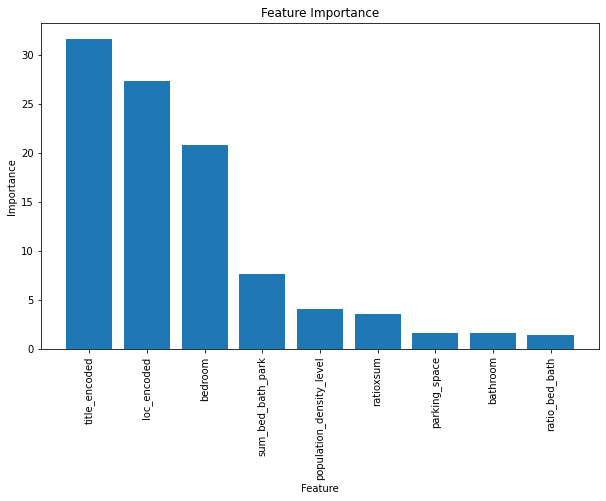

In [29]:
import matplotlib.pyplot as plt
feature_importance = model.get_feature_importance()

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store the feature importance scores with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [30]:

X_test = test.drop(['ID'], axis=1)

# Use the trained model to predict prices for the test dataset
y_pred = model.predict(X_test)

# Reshape the predicted values to be a 1-dimensional array
y_pred = y_pred.reshape(-1)

# Create a DataFrame with ID and predicted price columns
predictions_df = pd.DataFrame({'ID': test['ID'], 'price': y_pred})

# Display the predictions DataFrame
predictions_df


,ID,price
0,845,2.407038e+06
1,1924,1.063811e+06
2,10718,1.268476e+06
3,12076,8.678022e+06
4,12254,1.923725e+06
...,...,...
5995,1594,1.845857e+06
5996,2416,1.984205e+06
5997,10195,1.979575e+06
5998,9455,1.364911e+06


In [31]:
predictions_df.to_csv('submission.csv', index=False)